In [ ]:
import pandas as pd
import datetime as dt

In [ ]:
dfy = pd.read_csv("./data/y.csv", index_col=0)
dfx = pd.read_excel("./data/compsaa_file2_20200701_20201231.xlsx").loc[lambda d: d.total_comment_num.notnull()]


c:\Users\evan\development\eda\venv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
convert_y_dates = lambda st: dt.datetime.strptime(st, "%Y-%m-%d")
convert_x_dates = lambda i: dt.datetime.strptime( str(i), "%Y%m%d.0")

In [ ]:
dfx = dfx.assign(date_joiner=lambda d: d.date_key.apply(convert_x_dates))
dfy = dfy.assign(date_joiner=lambda d: d.date_time.apply(convert_y_dates))

In [ ]:
dfy.head()

,Unnamed: 0,date_time,product_name,sku,brand,deal_num,to_cart_num,date_joiner
0,0,2020-01-01,美素佳儿（Friso）儿童配方奶粉 4段（3岁以上至6岁适用）900克（荷兰原装进口）,100004774814,美素佳儿（Friso）,0,4,2020-01-01
1,1,2020-01-01,美素佳儿（Friso Prestige）皇家儿童配方奶粉 4段（3岁以上至6岁适用） 800...,100006224968,美素佳儿（Friso）,0,3,2020-01-01
2,2,2020-01-01,美素力（Frisolac Prestige）皇家婴儿配方奶粉 1段（0-6个月婴儿适用） 4...,100007187818,美素佳儿（Friso）,0,3,2020-01-01
3,3,2020-01-01,美素佳儿（Friso）较大婴儿配方奶粉 2段（6-12个月婴幼儿适用）1200克（荷兰原装进口）,100004188413,美素佳儿（Friso）,0,5,2020-01-01
4,4,2020-01-01,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）900克（新客礼）,100003754072,美素佳儿（Friso）,0,2,2020-01-01


In [ ]:
dfx.head()

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key,date_joiner
0,100021558806,爱尔兰原装进口 爱他美（Aptamil）英国HMO较大婴儿配方奶粉2段（6-12个月）易乐罐...,NaN,NaN,7.0,20211005.0,2021-10-05
1,10022644635456,【现货】美国Edward & Sons有 机椰丝烘焙227g,NaN,NaN,0.0,20201225.0,2020-12-25
2,10030902240475,学生牛奶粉高钙高锌900g*2罐装儿童青少年高中大学女营养成长 【送:礼袋+燕麦片1袋】学生...,NaN,NaN,NaN,20210515.0,2021-05-15
3,43541408544,京东超市 合生元 爱斯时光 1段400g 婴儿配方奶粉0-6个月 原罐进口,NaN,NaN,697.0,20211102.0,2021-11-02
4,55514902865,【送礼礼盒】蒙牛金装铂金装中老年/学生/成人多维高钙成人奶粉2罐装 送长辈父母孩子营养奶粉 ...,NaN,NaN,169.0,20210508.0,2021-05-08


Intersection of skus across datasets:

In [ ]:
sku_overlaps = set(dfx.sku).intersection(set(dfy.sku))
print(f"unique number of sku id's across datasets = {len(sku_overlaps)}")

unique number of sku id's across datasets = 163


Intersection of product names across datasets

In [ ]:
name_overlaps = set(dfx.product_name).intersection(set(dfy.product_name))
print(f"unique number of sku id's across datasets = {len(name_overlaps)}")

unique number of sku id's across datasets = 82


In [ ]:
overlapped_sku = sku_overlaps.pop()

In [ ]:
dfx.loc[lambda dd: dd.loc[lambda d: d.sku.isin(sku_overlaps)].total_comment_num.notnull().loc[lambda x: x].index].sku.value_counts()

100003254211    27
100002643949    27
100005794930    25
100004404957    24
100005855583    23
                ..
100017132980     1
100003754072     1
100017379210     1
100016053346     1
100017879356     1
Name: sku, Length: 163, dtype: int64

Example SKU = 100004404957

<AxesSubplot:xlabel='date_joiner'>

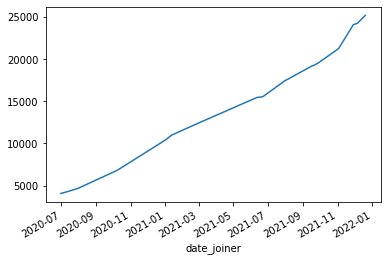

In [ ]:
dfx.loc[lambda d: d.sku == 100005855583].set_index('date_joiner').sort_index().total_comment_num.plot()#.total_comment_num

<AxesSubplot:xlabel='date_joiner'>

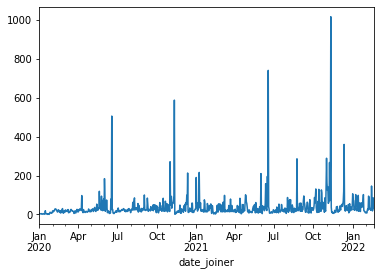

In [ ]:
dfy.loc[lambda d: d.sku == 100005855583].groupby(['sku', 'date_joiner'])['deal_num'].max().droplevel(0).plot()

## Hypothesis 1

`tcd-0030` is correlated to sales (compass/GP#232)

### `tcd-0030` definition
take a random observation of all-comments, at time `t_0`. 

1. find the closest observation of `tc` to that time, call it `tc_m30`.  
2. then, compute the number of days that `tc_m30` is away from `t_0 - 30d`, and call it `tc-delta-m30`
3. last, compute the difference between `tc` and `tc_m30`, call it `tcd-0030`

In [ ]:
from datetime import timedelta
from matplotlib import pyplot as plt

In [ ]:
x_sers = dfx.loc[lambda d: d.sku == 100005855583].set_index('date_joiner').sort_index().total_comment_num.copy()
display(x_sers)

date_joiner
2020-07-01     4078.0
2020-07-10     4245.0
2020-07-31     4676.0
2020-10-09     6842.0
2021-01-02    10436.0
2021-01-12    10975.0
2021-03-02    12450.0
2021-03-07    12599.0
2021-06-12    15447.0
2021-06-13    15449.0
2021-06-22    15527.0
2021-08-01    17464.0
2021-08-03    17522.0
2021-09-18    19212.0
2021-09-21    19256.0
2021-09-25    19424.0
2021-09-26    19451.0
2021-09-29    19574.0
2021-11-03    21238.0
2021-11-29    24064.0
2021-12-04    24178.0
2021-12-06    24230.0
2021-12-20    25158.0
Name: total_comment_num, dtype: float64

In [ ]:
## in the above case, there are several values to choose.  let's try doing this by month.
# reduce the data to observations separated by month, to avoid over-correlating the observations.

def compute_tcd00m(x_df: pd.Series, 
                   m=20,
                   sku_col = "sku",
                   tc_col = "total_comment_num",
                   ) -> pd.DataFrame:
    """Take series of relevant products to compute `tcd-00{m}`.

    expected input:
        pd.DataFrame:
            columns = *_col
            datetime index

    start with tcd-0020, but, may need to try.. 
      - tcd-0030
      - tcd-0040
      - tcd-0050
      - tcd-0060
    """


    assert sku_col in x_df.columns
    assert tc_col in x_df.columns
    # add assert for time series index?

    sku_num = x_df.loc[:, sku_col].iat[0]

    last_ts, tcs, tss, tc_deltas, tcd_0030s = None, [], [], [], []
    min_time_between_obs = timedelta(days=m)

    for ts, tc in x_df.loc[:, tc_col].iteritems():
        if not last_ts:
            last_ts, last_tc = ts, tc
            continue

        time_between_obs = ts - last_ts

        if time_between_obs > min_time_between_obs:
            tcs.append(tc)
            tss.append(ts)
            tc_deltas.append(time_between_obs-min_time_between_obs)
            tcd_0030s.append(tc - last_tc)
            last_ts, last_tc = ts, tc

    output = {"tcs": tcs,
              "tss": tss,
              "tc_deltas": tc_deltas,
              f"tcd_00{m:02d}s": tcd_0030s,
              "sku": sku_num}

    return pd.DataFrame(output).set_index(['sku', 'tss'])



In [ ]:
compute_tcd00m(dfx.loc[lambda d: d.sku == 100005855583].set_index('date_joiner').sort_index())

tcs tc_deltas  tcd_0020s
sku          tss                                     
100005855583 2020-07-31   4676.0   10 days      598.0
             2020-10-09   6842.0   50 days     2166.0
             2021-01-02  10436.0   65 days     3594.0
             2021-03-02  12450.0   39 days     2014.0
             2021-06-12  15447.0   82 days     2997.0
             2021-08-01  17464.0   30 days     2017.0
             2021-09-18  19212.0   28 days     1748.0
             2021-11-03  21238.0   26 days     2026.0
             2021-11-29  24064.0    6 days     2826.0
             2021-12-20  25158.0    1 days     1094.0

In [ ]:
feature_dfs = []
subset_df = lambda dd, idx: dfx.loc[lambda d: d.sku == idx].set_index('date_joiner').sort_index()

for sku in sku_overlaps:
    df_features = compute_tcd00m(dfx.pipe(subset_df, idx=sku))
    feature_dfs.append(df_features)

In [ ]:
dfa = pd.concat(feature_dfs)

In [ ]:
dfy.rename(columns={"date_joiner": "tss"}).head()

,,date_time,product_name,brand,deal_num,to_cart_num
sku,tss,,,,,
100003754072,2020-01-01,2020-01-01,美素佳儿（Friso）幼儿配方奶粉 3段（1-3岁幼儿适用）900克（新客礼）,美素佳儿（Friso）,0,2
100004188413,2020-01-01,2020-01-01,美素佳儿（Friso）较大婴儿配方奶粉 2段（6-12个月婴幼儿适用）1200克（荷兰原装进口）,美素佳儿（Friso）,0,5
100004774814,2020-01-01,2020-01-01,美素佳儿（Friso）儿童配方奶粉 4段（3岁以上至6岁适用）900克（荷兰原装进口）,美素佳儿（Friso）,0,4
100006224968,2020-01-01,2020-01-01,美素佳儿（Friso Prestige）皇家儿童配方奶粉 4段（3岁以上至6岁适用） 800...,美素佳儿（Friso）,0,3
100007187818,2020-01-01,2020-01-01,美素力（Frisolac Prestige）皇家婴儿配方奶粉 1段（0-6个月婴儿适用） 4...,美素佳儿（Friso）,0,3


In [ ]:
reduced_y = (dfy
     .loc[lambda d: d.sku.isin(sku_overlaps)]  # this part is the key-- for compute
     .rename(columns={"date_joiner": "tss"})
     .groupby(['sku', 'tss'])['deal_num']  # there are weird dups in the y data.. possible need to investigate
     .max()
     .sort_index()
     )

In [ ]:
def m_shifter(data, col, m=20):
    return data.assign(**{f"{col}_{i:02d}": data.loc[:, col].shift(i) for i in range(1, m)})


In [ ]:
agg_y = (reduced_y
        .to_frame()
        .pipe(m_shifter, col="deal_num")
        .assign(**{f"dealnum{20}": lambda d: d.sum(axis=1)})
        .loc[:, "dealnum20"]
        )

In [ ]:
agg_y

sku           tss       
2112715       2020-01-01    102.0
              2020-01-02    125.0
              2020-01-03    129.0
              2020-01-04    181.0
              2020-01-05    199.0
                            ...  
100026817154  2022-02-13      0.0
              2022-02-15      0.0
              2022-02-16      0.0
              2022-02-17      0.0
              2022-02-18      0.0
Name: dealnum20, Length: 85347, dtype: float64

In [ ]:
df_final = dfa.join(agg_y)

<Figure size 504x504 with 0 Axes>

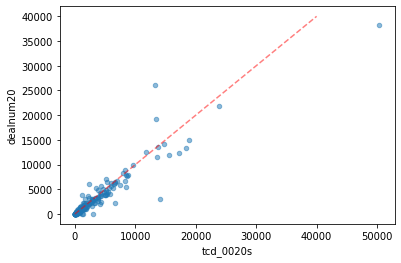

In [ ]:
plt.figure(figsize=(7,7))
(df_final
 .loc[lambda d: d.tc_deltas < timedelta(days=10)]
 .plot(kind="scatter", y="dealnum20", x="tcd_0020s", alpha=0.5)
)
plt.plot([0,4e4], [0,4e4], 'r--', alpha=.5)